In [2]:
import numpy as np
input=[[1,2,3,2.5],[2,5,-1,2],[-1.5,2.7,3.3,-0.8]]
weight=[[2,3,5,6],[-1.5,2.7,3,4],[3,5,-1,2]]
weight2=[[2.3,5,7],[3,7,3],[2,6,7]]
bais=[2,4,6]
bais2=[3,5,7]
input_n= np.array(input)
weight_n= np.array(weight)
weight2_n= np.array(weight2)
bais_n= np.array(bais)
bais2_n= np.array(bais2)
output= np.dot(input_n,np.array(weight_n).T)+bais_n
output2= np.dot(output,np.array(weight2_n).T)+bais2_n
print(output2)

[[376.5  376.3  395.4 ]
 [458.9  351.5  474.  ]
 [218.14 233.38 236.74]]


In [3]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
class layer_dense():
    def __init__(self,input,neurons):
        self.weight= 0.01 * np.random.randn(input,neurons)
        self.baises = np.zeros((1,neurons)) 
    def forward(self,input):
        self.output = np.dot(input,self.weight) + self.baises
#x,y =spiral_data(samples=100,classes=3)
#dense1=layer_dense(2,3)
#dense1.forward(x)
#print(dense1.output[:5]) 

   

In [4]:
import numpy as np
class Activation_Relu:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
#a=Activation_Relu()
#input=[4,-7,9,-8,-9 ,68]
#a.forward(input)
#print(a.output)

In [5]:
class softmax:
    def forward(self,inputs):
        exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        prob_values = exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=prob_values
#a=softmax()
#a.forward(input)
#print(a.prob_values)

In [6]:
softmax_output=np.array([[0.7,0.1,0.2],[0.1,0.5,0.4],[0.02,0.9,0.08]])
class_target=[0,1,1]
print(softmax_output[[0,1,2],class_target])
neg_log= -np.log(softmax_output[range(len(softmax_output)),class_target])
print(neg_log)
average_loss=np.mean(neg_log)
print(average_loss)

[0.7 0.5 0.9]
[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [7]:
class loss_function:
    def calculate(self,y_pred,y_true):
        sample_loss= self.forward(y_pred,y_true)
        data_loss=np.mean(sample_loss)
        return data_loss

In [8]:
class loss_categoricalcrossentropy(loss_function):
    def forward(self,y_pred,y_true):
        sample=len(y_pred)
        y_pred_clipped =np.clip(y_pred,1e-7,1-1e-7)
        if len(y_true.shape) == 1:
            correct_confidences=y_pred_clipped [range(sample),y_true]
        elif len(y_true.shape) >= 2:
            correct_confidences = np.sum(y_pred_clipped*y_true,axis=1)
        neg_log_likehood= -np.log(correct_confidences)
        return neg_log_likehood       


In [9]:
x,y=spiral_data(samples=100,classes=3)
dense1 = layer_dense(2,6)
activation1=Activation_Relu()
dense2 =layer_dense(6,3)
activation2= softmax()
dense1.forward(x)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])
loss_function=loss_categoricalcrossentropy()
loss2=loss_function.calculate(activation2.output,y)
print(loss2)



[[0.33333334 0.33333334 0.33333334]
 [0.33333382 0.33333293 0.33333328]
 [0.3333338  0.3333329  0.3333333 ]
 [0.3333332  0.33333352 0.33333325]
 [0.33333313 0.3333336  0.33333328]]
1.0986161


In [10]:
import numpy as np
weights=np.array([-3.0,-1.0,2.0])
bais= 1.0
input=np.array([1.0,-2.0,3.0])
target_output =0.0
larning_rate =0.001

def relu(x):
    return np.maximum(0,x)
def relu_derivative(x):
    return np.where(x>0,1.0,0.0)
for iteration in range(295):
    # forward computation
    linear_output = np.dot(weights,input) * bais
    output = relu(linear_output)
    loss= (output -target_output)**2 #x**2
    #backward computation
    bloss_boutput= 2*(output-target_output) #loss inverse =2x
    boutput_blinear=relu_derivative(linear_output)#relu inverse
    bweights =input #sum(x value )=1f(x,y,z) then input is value 
    b_bais=1.0
    
    b_loss_blinear = bloss_boutput*boutput_blinear
    bloss_bweight= b_loss_blinear*bweights
    bloss_b_bais =b_loss_blinear*b_bais
    
    weights-= larning_rate*bloss_bweight
    bais-=larning_rate *bloss_b_bais
    
    print(f'iteration{iteration+1},loss:{loss}')
print("final weights",weights)
print("final_bais",bais)   

iteration1,loss:25.0
iteration2,loss:23.149571231934605
iteration3,loss:21.460589186657135
iteration4,loss:19.916697390187853
iteration5,loss:18.503427052089982
iteration6,loss:17.20794962599952
iteration7,loss:16.01888210618147
iteration8,loss:14.926089419526795
iteration9,loss:13.920545162951552
iteration10,loss:12.994177203422472
iteration11,loss:12.13977376629152
iteration12,loss:11.350867015801642
iteration13,loss:10.621655507795001
iteration14,loss:9.946919094856934
iteration15,loss:9.321960793045964
iteration16,loss:8.742541131433125
iteration17,loss:8.204837911995575
iteration18,loss:7.705387684757566
iteration19,loss:7.241058777586166
iteration20,loss:6.809009059280341
iteration21,loss:6.406658522714812
iteration22,loss:6.031661646914959
iteration23,loss:5.6818828679446645
iteration24,loss:5.35537849308488
iteration25,loss:5.050372192628373
iteration26,loss:4.765242290496898
iteration27,loss:4.498507509416552
iteration28,loss:4.248810077085558
iteration29,loss:4.01490793220153

In [11]:
import numpy as np 
inputs=np.array([1,2,3,4])
weights=np.array([[0.1,0.2,0.3,0.4],[0.5,0.6,0.7,0.8],[0.9,1.0,1.1,1.2]])
biases=np.array([0.11,0.2,0.3])
learning_rate= 0.001

def relu(x):
    return np.maximum(0,x)
def relu_derivative(x):
    return np.where(x>0,1,0)
for iteration in range(200):
    z= np.dot(weights,inputs)+biases
    a=relu(z)
    y=np.sum(a)
    loss= y**2
    #backpropogation
    bl_by=2**y
    by_ba=np.ones_like(a)
    bl_ba=bl_by*by_ba
    ba_bz=relu_derivative(z)
    bl_bz=bl_ba*ba_bz
    bl_bw=np.outer(bl_bz,inputs)
    bl_bb=bl_bz
    
    weights -= learning_rate*bl_bw
    biases-=learning_rate*bl_bb
    
    if iteration %20 ==0:
        print(f"iteration:{iteration+1},loss:{loss}")
        print(bl_by)
        print(by_ba)
        print(bl_ba)
        print(bl_bz)
        print(bl_bw)
        
print('final weights:',weights) 
print('final biases:',biases)   

iteration:1,loss:466.9921
3200797.552590053
[1. 1. 1.]
[3200797.55259005 3200797.55259005 3200797.55259005]
[3200797.55259005 3200797.55259005 3200797.55259005]
[[ 3200797.55259005  6401595.10518011  9602392.65777016 12803190.21036021]
 [ 3200797.55259005  6401595.10518011  9602392.65777016 12803190.21036021]
 [ 3200797.55259005  6401595.10518011  9602392.65777016 12803190.21036021]]
iteration:21,loss:0.0
1.0
[1. 1. 1.]
[1. 1. 1.]
[0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
iteration:41,loss:0.0
1.0
[1. 1. 1.]
[1. 1. 1.]
[0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
iteration:61,loss:0.0
1.0
[1. 1. 1.]
[1. 1. 1.]
[0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
iteration:81,loss:0.0
1.0
[1. 1. 1.]
[1. 1. 1.]
[0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
iteration:101,loss:0.0
1.0
[1. 1. 1.]
[1. 1. 1.]
[0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
iteration:121,loss:0.0
1.0
[1. 1. 1.]
[1. 1. 1.]
[0. 0. 0.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0

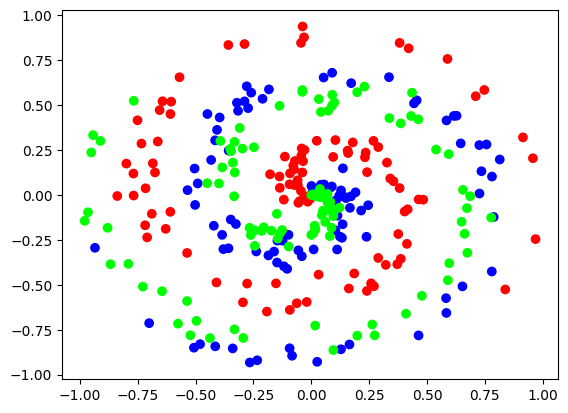

In [12]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
x,y=spiral_data(samples=100,classes=3)
plt.scatter(x[:,0],x[:,1],c=y, cmap='brg')
plt.show()

In [13]:
class Layer_dense:
    def __init__(self,n_inputs,n_neurons):
        self.weight=0.01*np.random.randn(n_inputs,n_neurons)
        self.biases= np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.inputs=inputs
        self.output=np.dot(inputs,self.weight)+self.biases
    def backward(self,dvalues):
        self.dweight= np.dot(self.inputs.T,dvalues)
        self.dbiases=np.sum(dvalues,axis=0,keepdims=True)
        self.dinput=np.dot(dvalues,self.weight.T)

In [14]:
class Activation_ReLU:
    def forward(self,inputs):
        self.inputs=inputs
        self.output=np.maximum(0,inputs)
    def backward(self,dvalues):
        self.dinput= dvalues.copy()
        self.dinput[self.inputs<=0]=0

In [15]:
class Activation_Softmax:
    def forward(self,inputs):
        exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probabilities=exp_values/np.sum(exp_values,axis=0,keepdims=True)
        self.output=probabilities

In [16]:
class loss_function:
    def calculate(self,y_pred,y_true):
        sample_loss= self.forward(y_pred,y_true)
        data_loss=np.mean(sample_loss)
        return data_loss
class Loss_categoricalCrossEntropy(loss_function):
    def forward(self,y_pred,Y_true):
        samples=len(y_pred)
        Y_pres_clipped=np.clip(y_pred,1e-7,1 - 1e-7)
        if len(Y_true.shape)==1:
            correct_confidence=Y_pres_clipped[range(samples),Y_true]
        elif len(Y_true.shape)==2:
            correct_confidence =np.sum(Y_pres_clipped*Y_true,axis=1)
        negative_log_likehoods= -np.log(correct_confidence)
        return negative_log_likehoods
    

In [17]:
class Activation_Softmax_Loss_CategoricalCrossEntropy:
    def __init__(self):
        self.activation =Activation_Softmax()
        self.loss =Loss_categoricalCrossEntropy()
    def forward(self,inputs,y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output,y_true)
    def backward(self,dvalues,Y_true):
        samples=len(dvalues)
        if len(Y_true.shape)==2:
            Y_true=np.argmax(Y_true,axis=1)
        self.dinput=dvalues.copy()
        self.dinput[range(samples),Y_true]-=1
        self.dinput=self.dinput /samples
       

In [18]:
X,y=spiral_data(samples=100,classes=3)
dense1=Layer_dense(2,3)
activation1=Activation_ReLU()
dense2=Layer_dense(3,3)
activation2=Activation_Softmax_Loss_CategoricalCrossEntropy()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
Loss=activation2.forward(dense2.output,y)
print(activation2.output[:5])
print('loss:',Loss)
predictions=np.argmax(activation2.output,axis=1)
if len(y.shape)==2:
    y=np.argmax(y,axis=1)
accuracy=np.mean(predictions==y)
print('acc:' , accuracy)
activation2.backward(activation2.output,y)
dense2.backward(activation2.dinput)
activation1.backward(dense2.dinput)
dense1.backward(activation1.dinput)
print(dense1.dweight)
print(dense1.dbiases)
print(dense2.dweight)
print(dense2.dbiases)

[[0.00333334 0.00333355 0.00333344]
 [0.00333334 0.00333355 0.00333344]
 [0.00333334 0.00333355 0.00333344]
 [0.00333334 0.00333354 0.00333344]
 [0.00333334 0.00333355 0.00333344]]
loss: 5.703782
acc: 0.34
[[-0.0007108   0.00042494  0.0004797 ]
 [ 0.00031674 -0.00173391  0.00036676]]
[[ 0.00288311  0.00539742 -0.00189672]]
[[-0.00063812 -0.00072636 -0.00086252]
 [-0.00085099 -0.00060755 -0.00094681]
 [-0.00055369 -0.00048151 -0.00073421]]
[[-0.329999   -0.32999948 -0.33      ]]


In [19]:
class optimizer_sGd:
    def __init__(self,learning_rate=1.,decay=0.,momentum=0.):
        self.learning_rate=learning_rate
        self.curr_learning_rate=self.learning_rate
        self.decay = decay
        self.iterations =0
        self.momentum= momentum
    def pre_update_params(self):
        if self.decay:
            self.curr_learning_rate = self.learning_rate * \
                (1./(1. + self.decay*self.iterations))
                
    def update_param(self,layer):
        if self.momentum:
            if not hasattr(layer,'weight_momentum'):
                layer.weight_momentum = np.zeros_like(layer.weight)
                layer.bias_momentum = np.zeros_like(layer.biases)
            weight_update = self.momentum * layer.weight_momentum -\
                self.curr_learning_rate * layer.dweight
            layer.weight_momentum = weight_update
            bias_update = self.momentum * layer.bias_momentum -\
                self.curr_learning_rate * layer.dbiases
            layer.bias_momentum = bias_update
        else:   
            weight_update -=  self.curr_learning_rate * layer.dweight
            bias_update -=  self.curr_learning_rate * layer.dbiases
        layer.weight += weight_update
        layer.biases += bias_update
    def post_update_params(self):
        self.iterations +=1

In [20]:
X,y=spiral_data(samples=100,classes=3)
dense1=Layer_dense(2,64)
activation1=Activation_ReLU()
dense2=Layer_dense(64,3)
activation2=Activation_Softmax_Loss_CategoricalCrossEntropy()
optimizer= optimizer_sGd(decay=1e-3,momentum=0.5)
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    Loss=activation2.forward(dense2.output,y)
    predictions=np.argmax(activation2.output,axis=1)
    if len(y.shape)==2:
        y=np.argmax(y,axis=1)
    accuracy=np.mean(predictions==y)
    if not epoch % 100 :
        print(f'epoch:{epoch},'+f'acc:{accuracy:.3f},'+f'loss:{Loss:.3f}')
    activation2.backward(activation2.output,y)
    dense2.backward(activation2.dinput)
    activation1.backward(dense2.dinput)
    dense1.backward(activation1.output)
    optimizer.pre_update_params()
    optimizer.update_param(dense1)
    optimizer.update_param(dense2)
    optimizer.post_update_params()
    

epoch:0,acc:0.313,loss:5.704
epoch:100,acc:0.333,loss:5.704
epoch:200,acc:0.333,loss:5.704
epoch:300,acc:0.333,loss:5.704
epoch:400,acc:0.333,loss:5.704
epoch:500,acc:0.333,loss:5.704
epoch:600,acc:0.333,loss:5.704
epoch:700,acc:0.333,loss:5.704
epoch:800,acc:0.333,loss:5.704
epoch:900,acc:0.333,loss:5.704
epoch:1000,acc:0.333,loss:5.704
epoch:1100,acc:0.333,loss:5.704
epoch:1200,acc:0.333,loss:5.704
epoch:1300,acc:0.333,loss:5.704
epoch:1400,acc:0.333,loss:5.704
epoch:1500,acc:0.333,loss:5.704
epoch:1600,acc:0.333,loss:5.704
epoch:1700,acc:0.333,loss:5.704
epoch:1800,acc:0.333,loss:5.704
epoch:1900,acc:0.333,loss:5.704
epoch:2000,acc:0.333,loss:5.704
epoch:2100,acc:0.333,loss:5.704
epoch:2200,acc:0.333,loss:5.704
epoch:2300,acc:0.333,loss:5.704
epoch:2400,acc:0.333,loss:5.704
epoch:2500,acc:0.333,loss:5.704
epoch:2600,acc:0.333,loss:5.704
epoch:2700,acc:0.333,loss:5.704
epoch:2800,acc:0.333,loss:5.704
epoch:2900,acc:0.333,loss:5.704
epoch:3000,acc:0.333,loss:5.704
epoch:3100,acc:0.333

C:\Users\mhari\AppData\Roaming\Python\Python312\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
C:\Users\mhari\AppData\Roaming\Python\Python312\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
C:\Users\mhari\AppData\Roaming\Python\Python312\site-packages\matplotlib\patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
C:\Users\mhari\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


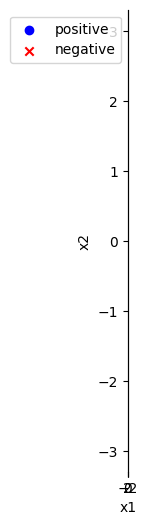

In [21]:
#percepton model
import numpy as np
import matplotlib.pyplot as plt
positive_points=np.array([(-2,3),(0,1),(2,-1)])
negative_points=np.array([(-2,1),(0,-1),(2,-3)])
plt.figure(figsize=(0,6))
plt.scatter(positive_points[:,0], positive_points[:,1],color='blue',marker='o',label='positive')
plt.scatter(negative_points[:,0], negative_points[:,1],color='red',marker="x",label="negative")
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [22]:
X=np.vstack((positive_points,negative_points))
Y=np.array([1]*len(positive_points)+[-1]*len(negative_points))

In [23]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [24]:
def perceptron(X,Y,steps=10):
    theta=np.zeros(X.shape[1])
    theta0=0
    for t in range(steps):
        for i,xi in enumerate(X):
            if Y[i]*(np.dot(xi,theta)+theta0)<=0:
                theta+=Y[i] *xi
                theta0+=Y[i]
                break
        plot_decision_boundary(theta,theta0,t+1)
    return theta,theta0

In [25]:
def plot_decision_boundary(theta,theta0,iteration):
    plt.figure(figsize=(0,6))
    plt.scatter(positive_points[:,0],positive_points[:,1],color='blue',label='postive class')
    plt.scatter(negative_points[:,0],negative_points[:,1],color='red',label='negative class')
    x_values=np.linspace(-3,3,2)
    if theta[1] !=0:
        y_values= -(theta[0] *x_values * theta0) /theta [1]
        plt.plot(x_values,y_values,label=f'iteration{iteration}')
    else:
        x_val =-theta0 / theta[0]
        plt.axvline(x=x_val,label=f'iteration{iteration}')
    plt.xlim (-3,3)
    plt.ylim(-4,4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'decision boundary at iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

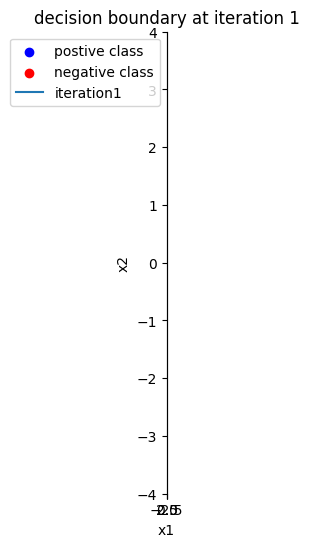

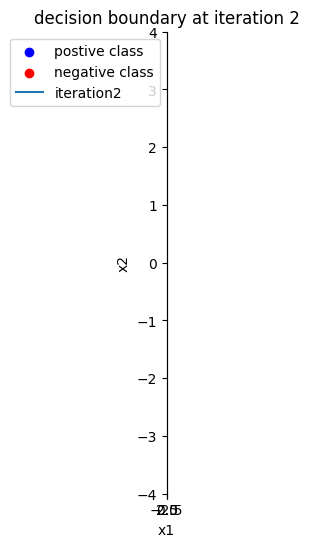

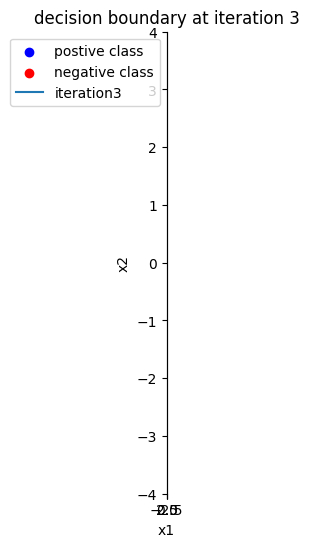

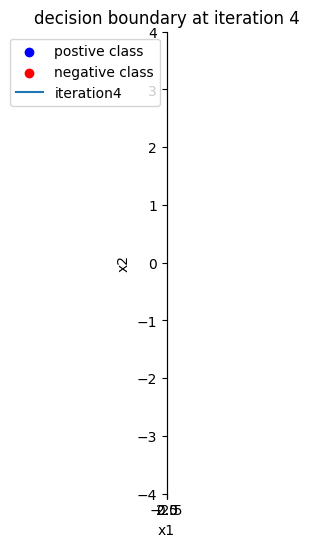

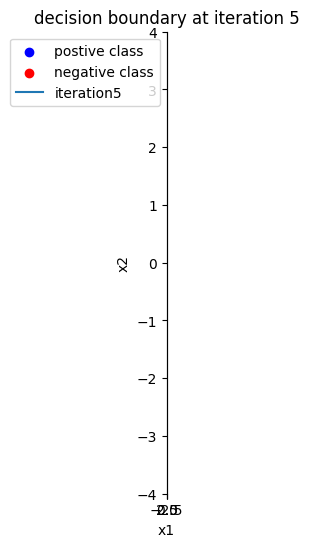

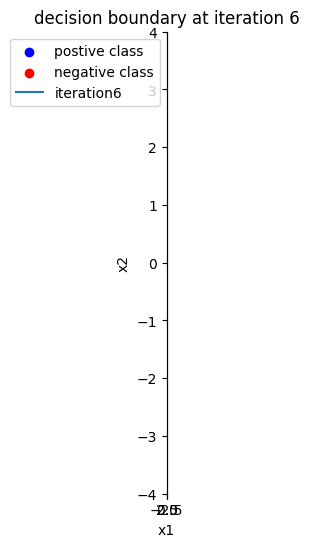

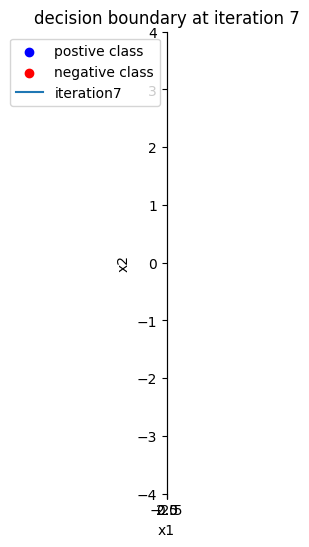

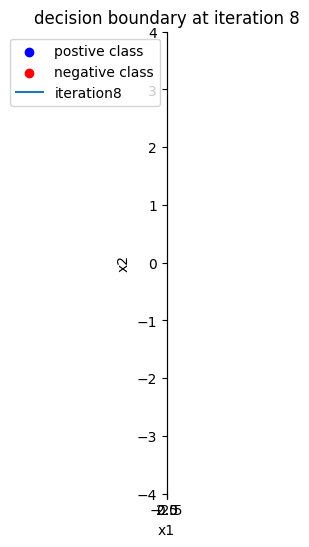

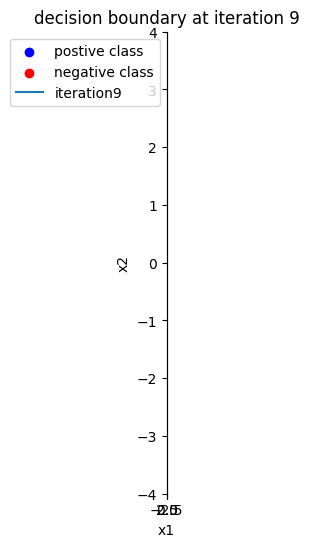

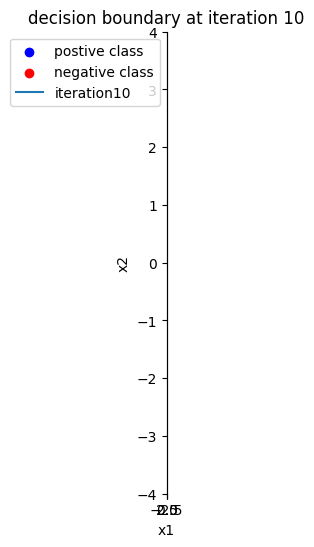

In [26]:
theta_final,theta0_final =perceptron(X,Y,10)

In [27]:
#random forest 
import numpy as np
import matplotlib.pyplot as plt


In [28]:
np.random.seed(0)

In [29]:
dog_whisker_length= np.random.normal(loc=5,scale=1,size=10)
dog_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)

In [30]:
dog_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [31]:
cat_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cat_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

In [32]:
cat_ear_flappiness_index

array([5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725])

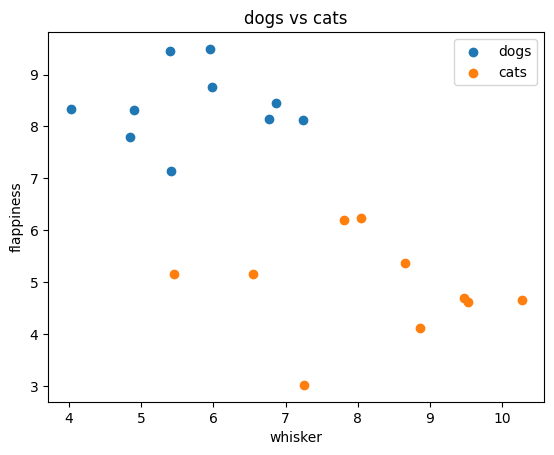

In [33]:
plt.scatter(dog_whisker_length,dog_ear_flappiness_index,label="dogs")
plt.scatter(cat_whisker_length,cat_ear_flappiness_index,label="cats")
plt.xlabel("whisker")
plt.ylabel("flappiness")
plt.title("dogs vs cats")
plt.legend()
plt.show()

In [41]:
def random_linear_classifier(daya_dogs,data_cats,k,d):
    best_error=float('inf')
    best_theta=None
    best_theta0=None
    for _ in range(k):
        theta= np.random.normal(size=d)
        theta0=np.random.normal()
        
        error=compute_error(daya_dogs,data_cats,theta,theta0)
        if error<best_error:
            best_error=error
            best_theta=theta
            best_theta0=theta0
    return best_theta,best_theta0

In [35]:
def compute_error(daya_dogs,data_cats,theta,theta0):
    error=0
    for x_dog in daya_dogs:
        if np.dot(theta,x_dog)*theta0<=0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat)*theta0 >0:
            error+=1
    return error

In [36]:
dogs_data=np.vstack((dog_whisker_length,dog_ear_flappiness_index)).T
cats_data=np.vstack((cat_whisker_length,cat_ear_flappiness_index)).T


In [37]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [42]:
k=100
d=2
best_theta,best_theta0=random_linear_classifier(dogs_data,cats_data,k,d)

In [43]:
best_theta

array([ 0.68159452, -0.80340966])